<a href="https://colab.research.google.com/github/Ice-CreamAT/DataCreditKaggle/blob/main/DataCredit_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # loading CSV files
import numpy as np
import seaborn as sns # graph visualization
import matplotlib.pyplot as plt # graph visualization
import plotly.express as px # Dynamics graphs

In [ ]:
base_credit = pd.read_csv('/content/sample_data/credit_data.csv')

In [ ]:
base_credit

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]

In [ ]:
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [ ]:
base_credit[base_credit['loan'] <= 1.377630		]

clientid        income        age     loan  default
865       866  28072.604355  54.142548  1.37763        0

In [ ]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

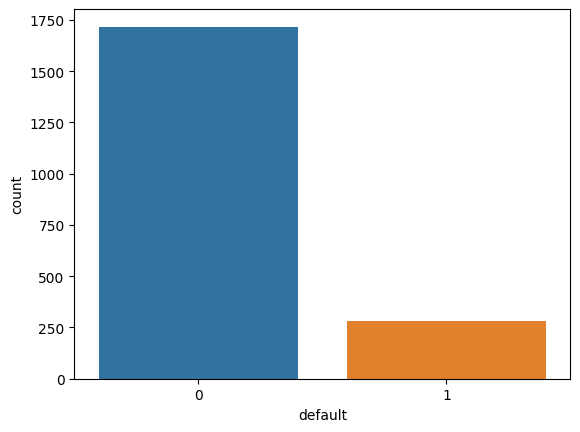

In [ ]:
sns.countplot(x = base_credit['default']);

In [ ]:
# delete inconsistent values
base_credit2 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit2

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [ ]:
base_credit.loc[(base_credit['clientid'] == 28) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)] # first location

clientid        income        age         loan  default
27        28  45727.459870  55.839922  6376.822949        0
30        31  48528.852796  40.807559  6155.784670        0
31        32  23526.302555  40.807559  2862.010139        0

In [ ]:
base_credit.loc[base_credit['clientid'].isin([29,31,32])] # second

clientid        income        age         loan  default
28        29  59417.805406  40.807559  2082.625938        0
30        31  48528.852796  40.807559  6155.784670        0
31        32  23526.302555  40.807559  2862.010139        0

In [ ]:
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
Y_credit = base_credit.iloc[:, 4].values
Y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
type(X_credit)
type(Y_credit)

numpy.ndarray

In [ ]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
X_credit[:, 0]

array([66155.92509508, 34415.15396582, 57317.17006303, ...,
       44311.44926231, 43756.05660491, 69436.57955155])

In [ ]:
X_credit[:, 0].min()

20014.4894700497

In [ ]:
X_credit[:, 0].max()

69995.6855783239

In [ ]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(20014.4894700497, -52.4232799196616, 1.37762959325451)

In [ ]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -6.849750041369694, -1.4592791099462408)

In [ ]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.701896398910515, 3.0616609141708273)

In [ ]:
X_credit

array([[ 1.45393393,  1.33786439,  1.20281942],
       [-0.76217555,  0.53704215,  0.69642695],
       [ 0.83682073,  1.63843621,  1.17471147],
       ...,
       [-0.07122592, -0.93972115,  0.35420081],
       [-0.11000289,  1.7018964 , -0.92675625],
       [ 1.682986  ,  1.1274146 ,  0.96381038]])

# **Database add**

In [ ]:
base_census = pd.read_csv('/content/sample_data/census.csv')
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [ ]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

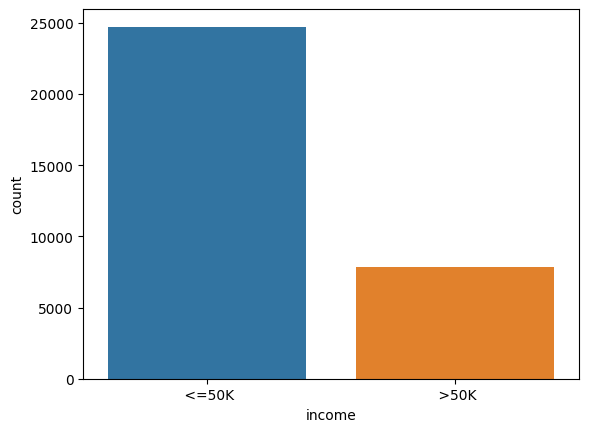

In [ ]:
sns.countplot(x = base_census['income']);

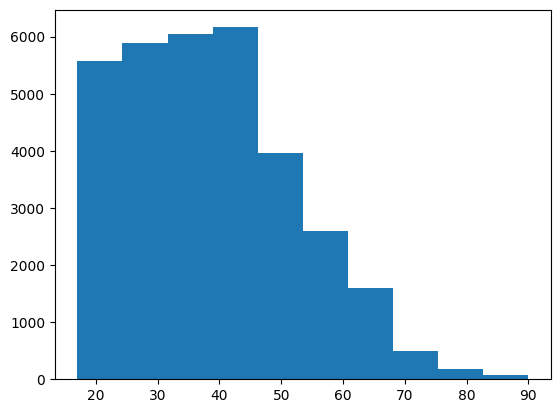

In [ ]:
plt.hist(x = base_census['age']);

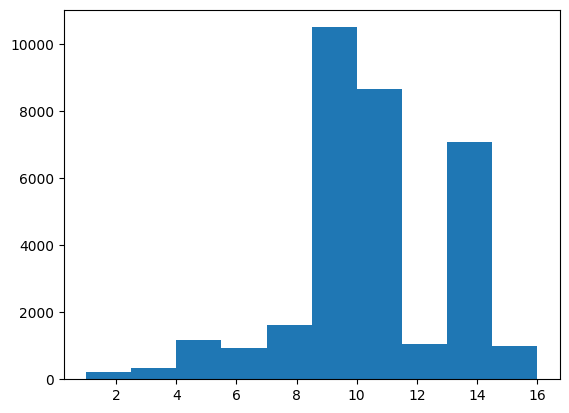

In [ ]:
plt.hist(x = base_census['education-num']);

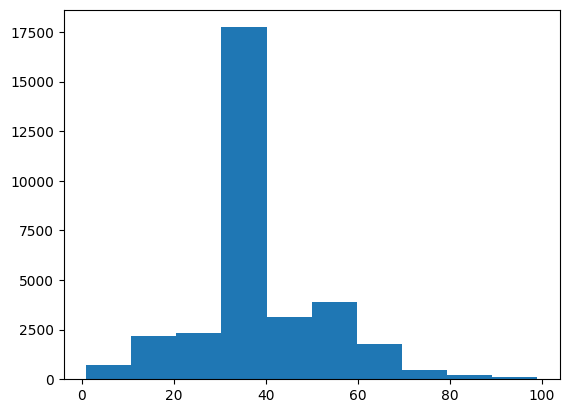

In [ ]:
plt.hist(x = base_census['hour-per-week']);

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
graph = px.treemap(base_census, path=['workclass'])
graph.show()

In [ ]:
graph = px.treemap(base_census, path=['workclass', 'age'])
graph.show()

In [ ]:
graph = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
graph.show()

In [ ]:
graph = px.parallel_categories(base_census, dimensions=['occupation', 'income', 'race'])
graph.show()


In [ ]:
graph = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
graph.show()

In [ ]:
graph = px.parallel_categories(base_census, dimensions=['race', 'income', 'sex'])
graph.show()


In [ ]:
X_census = base_census.iloc[:, 0:14].values
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
Y_census = base_census.iloc[:, 14].values
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# **Label** **Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_test = LabelEncoder()

In [ ]:
test = label_encoder_test.fit_transform(X_census[:,1])

In [ ]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

# **One Hot Encoder** (The method I most recommend)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
len(np.unique(base_census['workclass'])) # 1 0 0 0 0 0 0 0 , 0 0 0 0 1 0 0 0 0

9

In [ ]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_census.shape

(32561, 108)

# **Data** **Ecalation**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [ ]:
X_census.shape

(32561, 108)

# **Division of Bases into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_training , X_credit_test, Y_credit_training, Y_credit_test = train_test_split(X_credit,
                                                                                       Y_credit,
                                                                                       test_size = 0.25,
                                                                                       random_state = 0)

In [ ]:
X_credit_training.shape, Y_credit_training.shape

((1500, 3), (1500,))

In [ ]:
X_census_training , X_census_test, Y_census_training, Y_census_test = train_test_split(X_census,
                                                                                       Y_census,
                                                                                       test_size = 0.15,
                                                                                       random_state = 0)

In [ ]:
X_census_training.shape, Y_census_training.shape

((27676, 108), (27676,))

In [ ]:
X_census_test.shape, Y_census_test.shape

((4885, 108), (4885,))

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
    pickle.dump([X_credit_training, Y_credit_training, X_credit_test, Y_credit_test], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
    pickle.dump([X_census_training, Y_census_training, X_census_test, Y_census_test], f)

# **Bayes** **Learning**

## **Credit** **Data** - 93.80%

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_training, Y_credit_training, X_credit_test, Y_credit_test = pickle.load(f)

In [ ]:
X_credit_training.shape, Y_credit_training.shape

((1500, 3), (1500,))

In [ ]:
X_credit_test.shape, Y_credit_test.shape

((500, 3), (500,))

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_training, Y_credit_training)

GaussianNB()

In [ ]:
predict = naive_credit_data.predict(X_credit_test)

In [ ]:
predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
Y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(Y_credit_test, predict)

0.938

In [ ]:
confusion_matrix(Y_credit_test, predict)

array([[430,   6],
       [ 25,  39]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

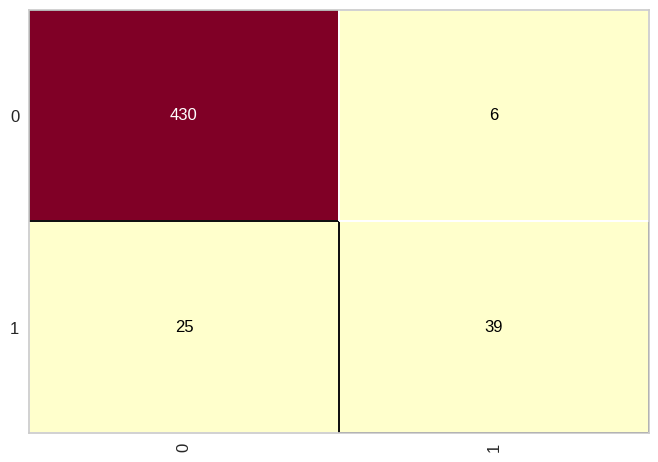

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_training, Y_credit_training)
cm.score(X_credit_test, Y_credit_test)

In [ ]:
print(classification_report(Y_credit_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       436
           1       0.87      0.61      0.72        64

    accuracy                           0.94       500
   macro avg       0.91      0.80      0.84       500
weighted avg       0.94      0.94      0.93       500



## **Census** **Data** - 47.77%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_training, Y_census_training, X_census_test, Y_census_test = pickle.load(f)

In [ ]:
X_census_training.shape, Y_census_training.shape

((27676, 108), (27676,))

In [ ]:
X_census_test.shape, Y_census_test.shape

((4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(X_census_training, Y_census_training)
predict = naive_census.predict(X_census_test)
predict

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
Y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(Y_census_test, predict) # Not execute escalation

0.4767656090071648

0.4767656090071648

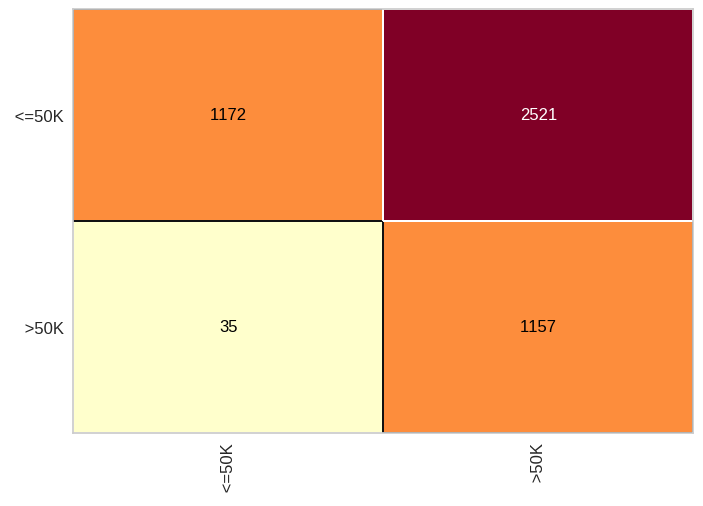

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_training, Y_census_training)
cm.score(X_census_test, Y_census_test)

In [ ]:
print(classification_report(Y_census_test, predict))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# **Decision Trees Learning**


##**Credit** **Data** - 98.80%

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [ ]:
x_credit_training.shape, y_credit_training.shape

((1500, 3), (1500,))

In [ ]:
x_credit_test.shape, y_credit_test.shape

((500, 3), (500,))

In [ ]:
credit_tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
credit_tree.fit(x_credit_training, y_credit_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predict = credit_tree.predict(x_credit_test)
predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_credit_test, predict)
accuracy

0.988

0.988

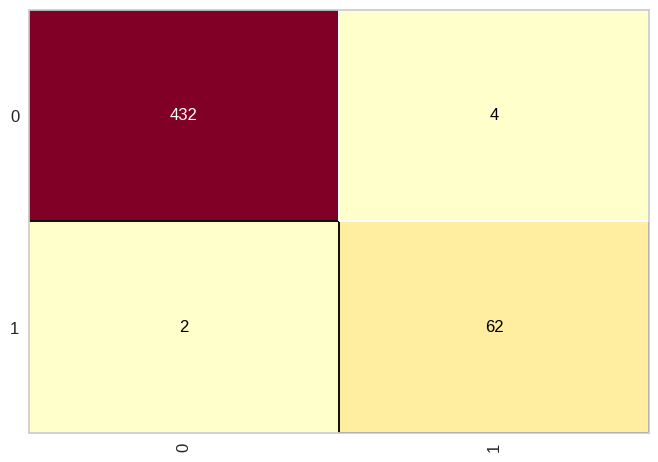

In [ ]:
from yellowbrick.classifier import confusion_matrix
cm = ConfusionMatrix(credit_tree)
cm.fit(x_credit_training, y_credit_training)
cm.score(x_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       436
           1       0.94      0.97      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.98      0.97       500
weighted avg       0.99      0.99      0.99       500



In [ ]:
credit_tree.classes_

array([0, 1])

In [ ]:
from sklearn import tree

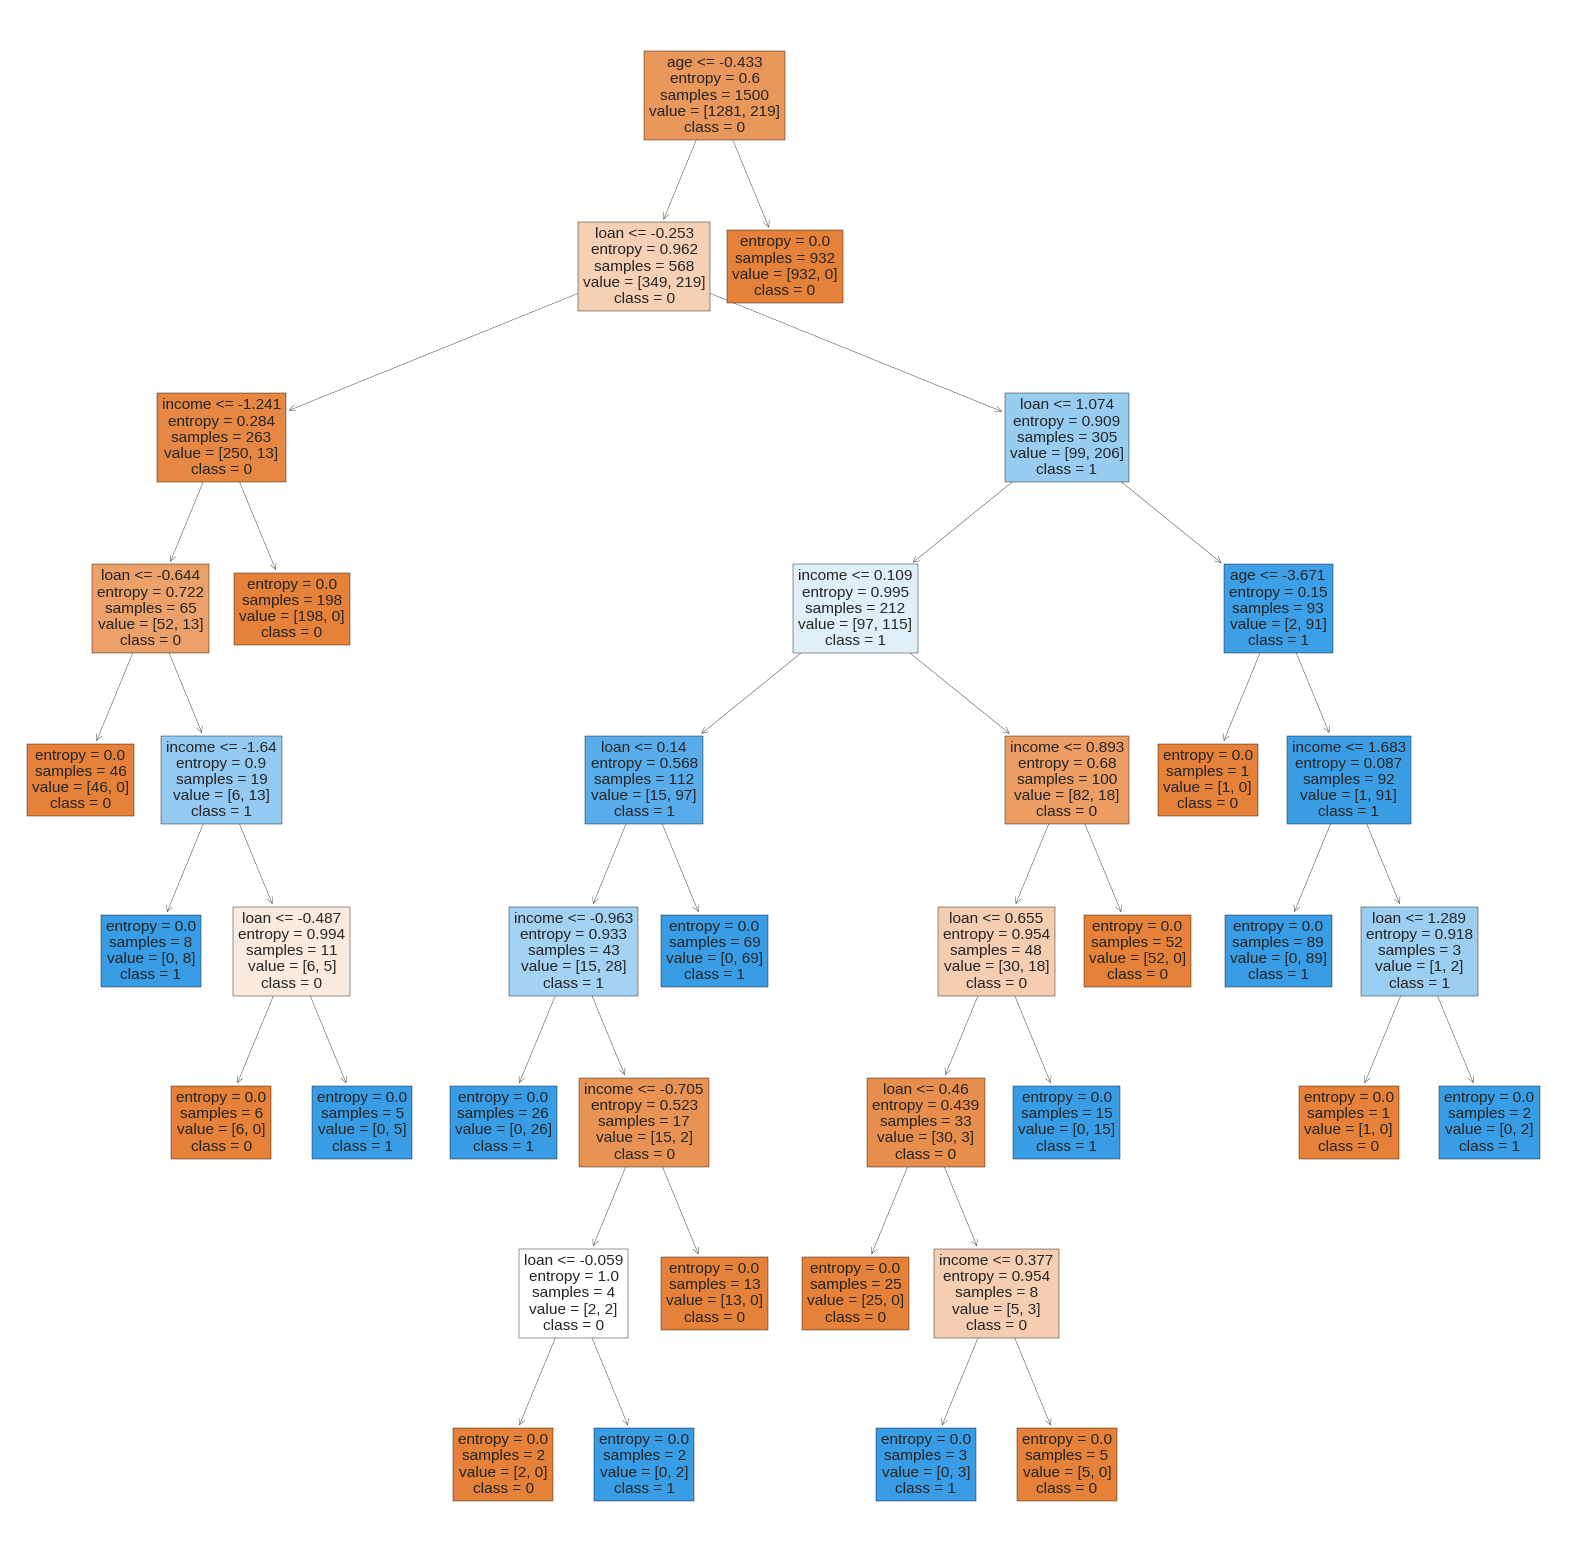

In [ ]:
predicts = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = [20,20])
tree.plot_tree(credit_tree, feature_names=predicts, class_names=['0','1'], filled = True)
fig.savefig('credit_tree.png')

##**Census** **Data** - 81.04%

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [ ]:
x_census_training.shape, y_census_training.shape

((27676, 108), (27676,))

In [ ]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [ ]:
census_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
census_tree.fit(x_census_training, y_census_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predicts = census_tree.predict(x_census_test)
predicts

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_test, predicts)

0.8104401228249745

0.8104401228249745

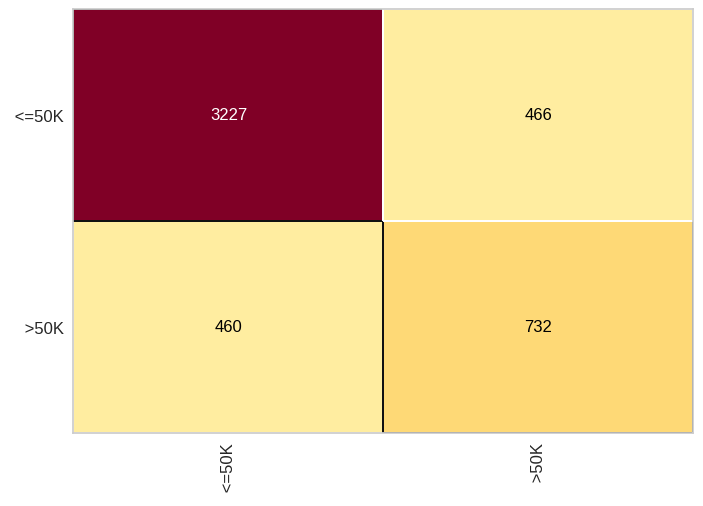

In [ ]:
from yellowbrick.classifier import confusion_matrix
cm = ConfusionMatrix(census_tree)
cm.fit(x_census_training, y_census_training)
cm.score(x_census_test, y_census_test)

In [ ]:
print(classification_report(y_census_test, predicts))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



#**Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

##Credit Data - 97.80%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [ ]:
x_credit_training.shape, y_credit_training.shape

((1500, 3), (1500,))

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_credit.fit(x_credit_training, y_credit_training)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
predicts = random_forest_credit.predict(x_credit_test)
predicts

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_test, predicts)

0.978

In [ ]:
print(classification_report(y_credit_test, predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       436
           1       0.93      0.89      0.91        64

    accuracy                           0.98       500
   macro avg       0.96      0.94      0.95       500
weighted avg       0.98      0.98      0.98       500



##Census Data - 85,07%

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [ ]:
x_census_training.shape, y_census_training.shape

((27676, 108), (27676,))

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_training, y_census_training)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
predicts = random_forest_census.predict(x_census_test)
predicts

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_test, predicts)

0.8507676560900717

0.8507676560900717

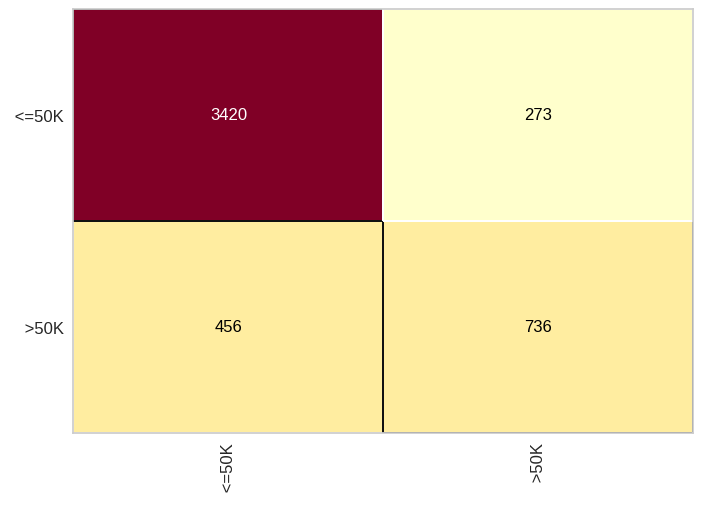

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_training, y_census_training)
cm.score(x_census_test, y_census_test)

In [ ]:
print(classification_report(y_census_test, predicts))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



#SVM

In [ ]:
from sklearn.svm import SVC

## Credit Data - 98.80%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [ ]:
x_credit_training.shape, y_credit_training.shape

((1500, 3), (1500,))

In [ ]:
y_credit_test.shape, y_credit_test.shape

((500,), (500,))

In [ ]:
svm_credit = SVC(kernel ='rbf', random_state = 1, C = 2.0)
svm_credit.fit(x_credit_training, y_credit_training)
print(svm_credit.fit)

<bound method BaseLibSVM.fit of SVC(C=2.0, random_state=1)>


In [ ]:
predicts = svm_credit.predict(x_credit_test)
predicts

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_test, predicts)

0.988

In [ ]:
print(classification_report(y_credit_test, predicts))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



##Census Data - 85.09%

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [ ]:
x_census_training.shape, y_census_training.shape

((27676, 108), (27676,))

In [ ]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [ ]:
svm_census = SVC(kernel ='linear', random_state = 1, C = 2.0)
svm_census.fit(x_census_training, y_census_training)
print(svm_census.fit)

<bound method BaseLibSVM.fit of SVC(C=2.0, kernel='linear', random_state=1)>


In [ ]:
predicts = svm_census.predict(x_census_test)
predicts

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_test, predicts)

0.8509723643807574

In [ ]:
print(classification_report(y_census_test, predicts))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

##Credit Data - 99.40%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [ ]:
x_credit_training.shape, y_credit_training.shape

((1500, 3), (1500,))

In [ ]:
x_credit_test.shape, y_credit_test.shape

((500, 3), (500,))

In [ ]:
neural_net_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.00000100
                                  #solver = 'adam', activation = 'relu',
                                  #hidden_layer_sizes=(70,70)
                                  )
neural_net_credit.fit(x_credit_training, y_credit_training)

Iteration 1, loss = 0.54119789
Iteration 2, loss = 0.49142114
Iteration 3, loss = 0.44982405
Iteration 4, loss = 0.41397821
Iteration 5, loss = 0.38328176
Iteration 6, loss = 0.35732639
Iteration 7, loss = 0.33442944
Iteration 8, loss = 0.31395056
Iteration 9, loss = 0.29553401
Iteration 10, loss = 0.27903529
Iteration 11, loss = 0.26404689
Iteration 12, loss = 0.25021588
Iteration 13, loss = 0.23771204
Iteration 14, loss = 0.22595160
Iteration 15, loss = 0.21540380
Iteration 16, loss = 0.20583405
Iteration 17, loss = 0.19684204
Iteration 18, loss = 0.18901986
Iteration 19, loss = 0.18161686
Iteration 20, loss = 0.17513820
Iteration 21, loss = 0.16901291
Iteration 22, loss = 0.16366126
Iteration 23, loss = 0.15853869
Iteration 24, loss = 0.15390577
Iteration 25, loss = 0.14966130
Iteration 26, loss = 0.14583953
Iteration 27, loss = 0.14216678
Iteration 28, loss = 0.13862867
Iteration 29, loss = 0.13539755
Iteration 30, loss = 0.13252665
Iteration 31, loss = 0.12969999
Iteration 32, los

MLPClassifier(max_iter=1500, tol=1e-06, verbose=True)

In [ ]:
predicts = neural_net_credit.predict(x_credit_test)
predicts

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_test, predicts)

0.994

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(neural_net_credit)
cm.fit(x_credit_training, y_credit_training)
cm.score(x_credit_test, y_credit_test)

NameError: name 'neural_net_credit' is not defined

##Census Data - 81.96%

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [ ]:
neural_net_census = MLPClassifier(max_iter=1500, verbose=True, tol=0.00000100,
                                  hidden_layer_sizes=(55,55))
neural_net_census.fit(x_census_training, y_census_training)

Iteration 1, loss = 0.38657759
Iteration 2, loss = 0.32560182
Iteration 3, loss = 0.31458272
Iteration 4, loss = 0.30774453
Iteration 5, loss = 0.30287477
Iteration 6, loss = 0.29939681
Iteration 7, loss = 0.29604669
Iteration 8, loss = 0.29356624
Iteration 9, loss = 0.29084814
Iteration 10, loss = 0.28929294
Iteration 11, loss = 0.28672160
Iteration 12, loss = 0.28530644
Iteration 13, loss = 0.28306081
Iteration 14, loss = 0.28191920
Iteration 15, loss = 0.27994627
Iteration 16, loss = 0.27786477
Iteration 17, loss = 0.27651111
Iteration 18, loss = 0.27463112
Iteration 19, loss = 0.27378908
Iteration 20, loss = 0.27154514
Iteration 21, loss = 0.26987480
Iteration 22, loss = 0.26819305
Iteration 23, loss = 0.26736161
Iteration 24, loss = 0.26623436
Iteration 25, loss = 0.26393771
Iteration 26, loss = 0.26353501
Iteration 27, loss = 0.26206553
Iteration 28, loss = 0.26022572
Iteration 29, loss = 0.25880458
Iteration 30, loss = 0.25821973
Iteration 31, loss = 0.25694930
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1500, tol=1e-06,
              verbose=True)

In [ ]:
predicts = neural_net_census.predict(x_census_test)
predicts

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_test, predicts)

0.816171954964176

0.816171954964176

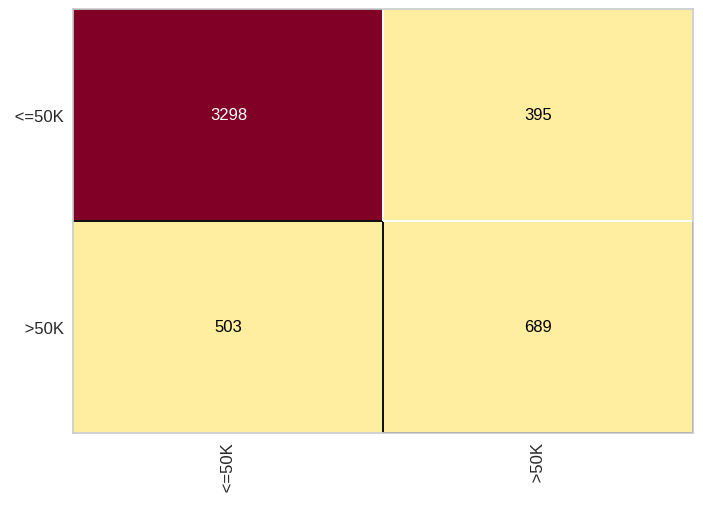

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(neural_net_census)
cm.fit(x_census_training, y_census_training)
cm.score(x_census_test, y_census_test)

In [ ]:
print(classification_report(y_census_test, predicts))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      3693
        >50K       0.64      0.58      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.75      0.74      0.74      4885
weighted avg       0.81      0.82      0.81      4885



#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
tree_results = []
random_forest_results = []
svm_results = []
neural_net_results = []

for i in range(30):
  #print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1,
                                min_samples_split=5, splitter='best')
  scores = cross_val_score(tree, X_credit, Y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  tree_results.append(scores.mean())


  random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1,
                                         min_samples_split=5, n_estimators=10)
  scores = cross_val_score(random_forest, X_credit, Y_credit, cv = kfold)
  random_forest_results.append(scores.mean())


  #svm = SVC(kernel='rbf', C=2.0)
  #scores = cross_val_score(svm, X_credit, Y_credit, cv = kfold)
  #svm_results.append(scores.mean())


  #neural_net = MLPClassifier(activation='relu', batch_size=56, solver='adam')
  #scores = cross_val_score(neural_net, X_credit, Y_credit, cv = kfold)
  #neural_net_results.append(scores.mean())



In [ ]:
tree_results, random_forest_results

([0.9814999999999999,
  0.9869999999999999,
  0.985,
  0.9814999999999999,
  0.9884999999999999,
  0.986,
  0.9865,
  0.9879999999999999,
  0.9879999999999999,
  0.983,
  0.9879999999999999,
  0.9869999999999999,
  0.9829999999999999,
  0.9879999999999999,
  0.9884999999999999,
  0.9889999999999999,
  0.9889999999999999,
  0.9884999999999999,
  0.9845,
  0.9884999999999999,
  0.983,
  0.9884999999999998,
  0.9870000000000001,
  0.986,
  0.985,
  0.9879999999999999,
  0.9870000000000001,
  0.9880000000000001,
  0.985,
  0.986],
 [0.9814999999999999,
  0.985,
  0.9795,
  0.9834999999999999,
  0.9804999999999999,
  0.9844999999999999,
  0.9844999999999999,
  0.9824999999999999,
  0.9875,
  0.9814999999999999,
  0.9804999999999999,
  0.9829999999999999,
  0.984,
  0.984,
  0.9814999999999999,
  0.983,
  0.9814999999999999,
  0.9854999999999998,
  0.9824999999999999,
  0.9834999999999999,
  0.984,
  0.984,
  0.9829999999999999,
  0.9835,
  0.9819999999999999,
  0.9824999999999999,
  0.983,
